In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
## Install xlrd package to load Excel files
# conda install openpyxl
## conda install xlrd

C:\Users\isikh\anaconda3\envs\DA_Env\lib\site-packages\statsmodels\compat\pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [2]:
print(pd.__version__)

1.4.1


## $\color{#DC143C}{\text{Activity 3}}$

In [3]:
## day 3 continuing with the clean file

file4_df = pd.read_csv('Data/Data_Marketing_Customer_Analysis_Round3.csv')
file4_df

,Unnamed: 0,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,0,central,4809,no,basic,college,2/18/11,feb,employed,m,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,...,31,1,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,...,40,2,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


In [4]:
#get the numeric data into dataframe called `numerical` and categorical columns in a dataframe called `categoricals`
numerical=file4_df.select_dtypes('number')
numerical

,Unnamed: 0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,0,4809,48029,61,7,52,0,9,292
1,1,2228,26794,64,3,26,0,1,744
2,2,14947,22139,100,34,31,0,2,480
3,3,22332,49078,97,10,3,0,2,484
4,4,9025,23675,117,15,31,1,7,707
...,...,...,...,...,...,...,...,...,...
10684,10684,15563,64811,253,8,40,2,7,1214
10685,10685,5259,61146,65,7,68,0,6,273
10686,10686,23893,39837,201,11,63,0,2,381
10687,10687,11971,64195,158,0,27,4,6,618


In [5]:
categoricals=file4_df.select_dtypes('object')
categoricals

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


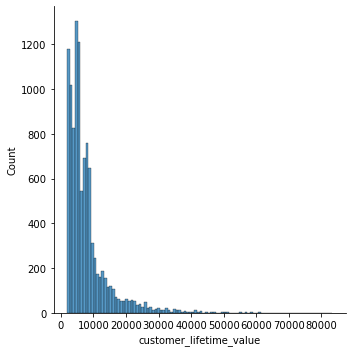

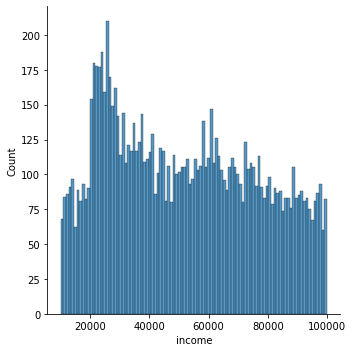

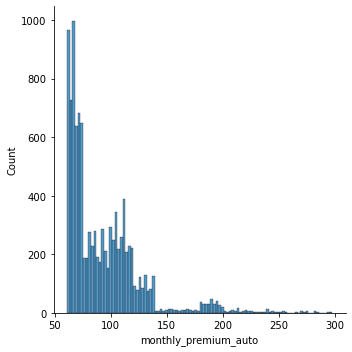

In [6]:
#displot works separately. We made the other graps by using hisplot as sublots below.
sns.displot((numerical['customer_lifetime_value']), bins=100)
sns.displot((numerical['income']), bins=100)
sns.displot((numerical['monthly_premium_auto']), bins=100)

array([[<AxesSubplot:title={'center':'customer_lifetime_value'}>,
        <AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'monthly_premium_auto'}>],
       [<AxesSubplot:title={'center':'months_since_last_claim'}>,
        <AxesSubplot:title={'center':'months_since_policy_inception'}>,
        <AxesSubplot:title={'center':'number_of_open_complaints'}>],
       [<AxesSubplot:title={'center':'number_of_policies'}>,
        <AxesSubplot:title={'center':'total_claim_amount'}>,
        <AxesSubplot:>]], dtype=object)

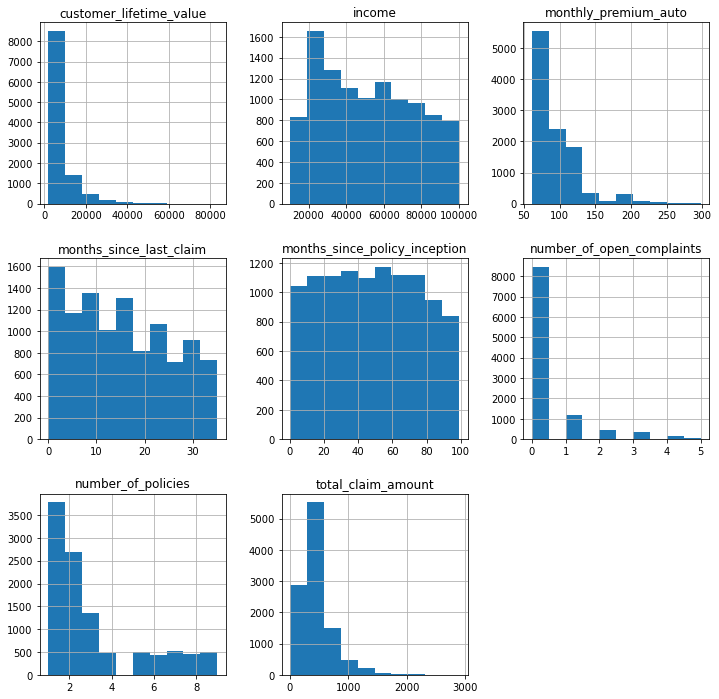

In [7]:
#Use Matplotlib to construct histograms
for_nice_graps = numerical.drop(['Unnamed: 0'], axis = 1)
for_nice_graps.hist(figsize=(12,12))

In [8]:
#Do the distributions for different numerical variables look like a normal distribution
#no

In [9]:
#For the numerical variables, check the multicollinearity between the features. 
#Please note that we will use the column total_claim_amount later as the target variable.
numerical.corr()

,Unnamed: 0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
Unnamed: 0,1.000000,0.000914,-0.004264,-0.001076,0.009031,0.013202,0.005535,0.002737,-0.003809
customer_lifetime_value,0.000914,1.000000,-0.000276,0.404235,0.012466,0.017055,-0.028099,0.016789,0.232849
income,-0.004264,-0.000276,1.000000,-0.010804,-0.018013,0.011509,0.013057,-0.001515,-0.118201
monthly_premium_auto,-0.001076,0.404235,-0.010804,1.000000,0.006959,0.019696,-0.002423,-0.018805,0.630149
months_since_last_claim,0.009031,0.012466,-0.018013,0.006959,1.000000,-0.036883,-0.002617,0.006791,0.008979
months_since_policy_inception,0.013202,0.017055,0.011509,0.019696,-0.036883,1.000000,0.004368,-0.009719,0.004186
number_of_open_complaints,0.005535,-0.028099,0.013057,-0.002423,-0.002617,0.004368,1.000000,0.002748,-0.007332
number_of_policies,0.002737,0.016789,-0.001515,-0.018805,0.006791,-0.009719,0.002748,1.000000,-0.008019
total_claim_amount,-0.003809,0.232849,-0.118201,0.630149,0.008979,0.004186,-0.007332,-0.008019,1.000000


In [10]:
#Drop one of the two features that show a high correlation between them (greater than 0.9). 
#If there is no pair of features that have a high correlation, then do not drop any features.
numerical.corr() > 0.9

,Unnamed: 0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
Unnamed: 0,True,False,False,False,False,False,False,False,False
customer_lifetime_value,False,True,False,False,False,False,False,False,False
income,False,False,True,False,False,False,False,False,False
monthly_premium_auto,False,False,False,True,False,False,False,False,False
months_since_last_claim,False,False,False,False,True,False,False,False,False
months_since_policy_inception,False,False,False,False,False,True,False,False,False
number_of_open_complaints,False,False,False,False,False,False,True,False,False
number_of_policies,False,False,False,False,False,False,False,True,False
total_claim_amount,False,False,False,False,False,False,False,False,True


## Activity 5

In [11]:
responses = categoricals['response'].value_counts()
responses

no     9328
yes    1361
Name: response, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


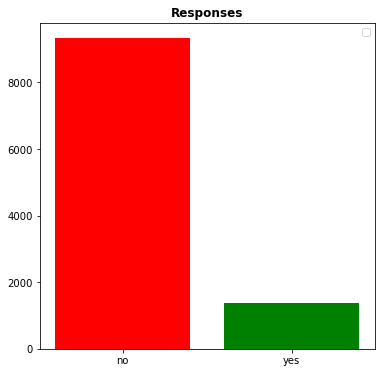

In [12]:
#Show a plot of the total number of responses.
# create figure and axes
fig3, ax3 = plt.subplots(figsize = (6,6))

# set title
ax3.set_title('Responses', fontweight='bold')

# plot the bar chart
ax3.bar(responses.index, responses, color=('red','green'))
ax3.legend()
#sns.barplot

In [13]:
#Show a plot of the response rate by the sales channel.
channels = categoricals['sales_channel'].value_counts()
channels

agent          4019
branch         2975
call center    2099
web            1596
Name: sales_channel, dtype: int64

In [14]:
#Show a plot of the response rate by the sales channel.

#this is extra

channel_responses = categoricals.groupby(['response','sales_channel'])['month'].count().reset_index()
channel_responses

#class_survival = titanic.groupby(['class','alive'])['unname'].count().reset_index()
#class_survival

,response,sales_channel,month
0,no,agent,3339
1,no,branch,2666
2,no,call center,1895
3,no,web,1428
4,yes,agent,680
5,yes,branch,309
6,yes,call center,204
7,yes,web,168


<BarContainer object of 4 artists>

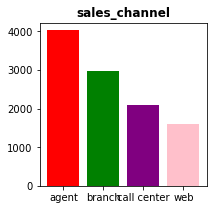

In [15]:
figsale, ax5 = plt.subplots(figsize = (3,3))
ax5.set_title('sales_channel', fontweight='bold')
ax5.bar(channels.index, channels, color=('red','green','purple','pink'))

<AxesSubplot:xlabel='sales_channel', ylabel='count'>

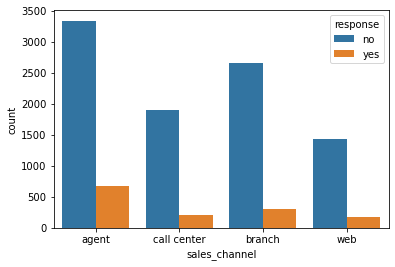

In [16]:
#Show a plot of the response rate by the sales channel.
sns.countplot(x='sales_channel', hue='response', data=categoricals)

C:\Users\isikh\anaconda3\envs\DA_Env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


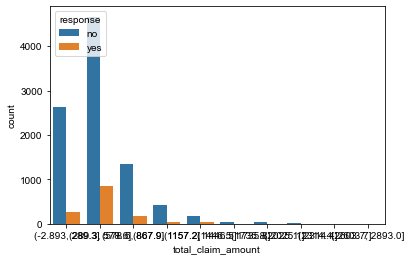

In [17]:
#Show a plot of the response rate by the total claim amount.
#sns.countplot(x=numericals['total_claim_amount'], hue=categoricals['response'])
total_claim_amount2 =pd.cut(numerical['total_claim_amount'],bins=10)

sns.countplot(total_claim_amount2, hue=categoricals['response'])
sns.set(rc={'figure.figsize':(20,20)})

#sns.barplot(x = categoricals['response'], y = numerical['total_claim_amount'])

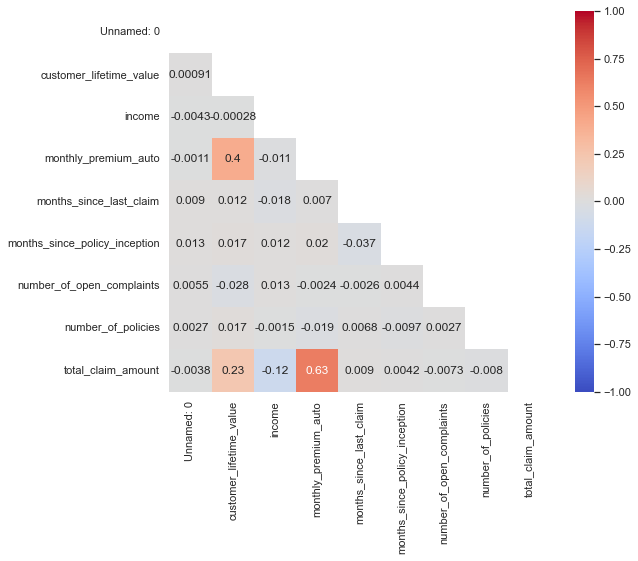

In [18]:
#Plot the Correlation Heatmap.

#heatmap ama ikinci kısmı saklıyor, tek taraflı yapıyor sadece
corr = file4_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True      
#burada üst kısmı seçtim sonra aşağıda beyaz yaptım
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
#normalde kod sadece bu kadar, normally this is the code:corr = hk_df.corr()
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

In [19]:
#Clean your notebook and make it a readible and presentable with a good documentation that summarizes the Data Cleaning, 
#Exploration(including plots) 
#Steps that you have performed.

## Activity 6

In [20]:
## Activity 6
# Hint: use the file Create Data_Marketing_Customer_Analysis_Round3.csv

# One Hot/Label Encoding of the categorical variables in the categoricals data frame that you created in Activity 4.
# ( Hint: check Dropfirst option).

categoricals=file4_df.select_dtypes('object')
categoricals



,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


In [21]:
categoricals =pd.get_dummies(categoricals, drop_first=True)
categoricals

,region_east,region_north west,region_west region,response_yes,coverage_extended,coverage_premium,education_college,education_doctor,education_high school or below,education_master,...,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
3,0,1,0,1,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,0,0,0,0,0,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
10685,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
10686,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
10687,0,0,1,0,0,1,1,0,0,0,...,1,0,0,0,0,0,1,0,1,0


In [22]:
#I want to drop the unnamed
numerical=numerical.drop('Unnamed: 0', axis=1)

# ( Hint: check Dropfirst option).

In [23]:
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,26794,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,15,31,1,7,707
...,...,...,...,...,...,...,...,...
10684,15563,64811,253,8,40,2,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


In [24]:
#concatinating numerical and categoricals
#we did it as last step and I modified the data with categoricals this time

concat_data=pd.concat([numerical,categoricals], axis=1)
concat_data

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,region_east,region_north west,...,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small
0,4809,48029,61,7,52,0,9,292,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2228,26794,64,3,26,0,1,744,0,0,...,0,1,0,0,0,0,0,0,1,0
2,14947,22139,100,34,31,0,2,480,1,0,...,0,1,0,0,0,0,1,0,1,0
3,22332,49078,97,10,3,0,2,484,0,1,...,1,0,0,0,0,0,0,0,1,0
4,9025,23675,117,15,31,1,7,707,0,1,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,15563,64811,253,8,40,2,7,1214,0,0,...,0,0,1,1,0,0,0,0,1,0
10685,5259,61146,65,7,68,0,6,273,0,1,...,1,0,0,0,0,0,0,0,1,0
10686,23893,39837,201,11,63,0,2,381,0,0,...,0,0,1,0,1,0,0,0,1,0
10687,11971,64195,158,0,27,4,6,618,0,0,...,1,0,0,0,0,0,1,0,1,0


In [25]:
# for the first iteration, we will focus on the numericals data (numericals data frame) as our data source.
# remove the outliers from the numerical columns.
#customer_lifetime_value= numerical['customer_lifetime_value']

#def remove_outliers():
    #pct_75 = pct(customer_lifetime_value, 75)  # Calculate percentile 75 using scipy function scoreatpercentile
    #pct_25 = pct(customer_lifetime_value, 25)  # Calculate percentile 25 using scipy function scoreatpercentile
    #upper_bound = pct_75 + 1.5*iqr(customer_lifetime_value)  # iqr - > Scipy function to calculate the Interquartile Range
    #lower_bound = pct_25 - 1.5*iqr(customer_lifetime_value)
   # customer_lifetime_value2 = customer_lifetime_value[(customer_lifetime_value <= upper_bound) & (customer_lifetime_value >= lower_bound)]  # Filter out the outliers
    #return customer_lifetime_value2
#calling the function
#remove_outliers()

In [26]:
#Q1 = numerical.quantile(0.25)
#Q3 = numerical.quantile(0.75)
#IQR = Q3 - Q1
#print(IQR)

In [27]:
#to check how many numbers can be outliers(probably) since 80 percent is zero...
print(numerical['number_of_open_complaints'].value_counts())

0    8467
1    1199
2     439
3     340
4     175
5      69
Name: number_of_open_complaints, dtype: int64


In [28]:
# Sarah's formula for outliers
#any checks rows. Nelson checked it for each column and the difference is 110 data.
#Q1 = numerical.quantile(0.25)
#Q3 = numerical.quantile(0.75)
#IQR = Q3 - Q1

#numerical = numerical[~((numerical < (Q1 - 1.5 * IQR)) |(numerical > (Q3 + 1.5 * IQR))).any(axis=1)]
#numerical

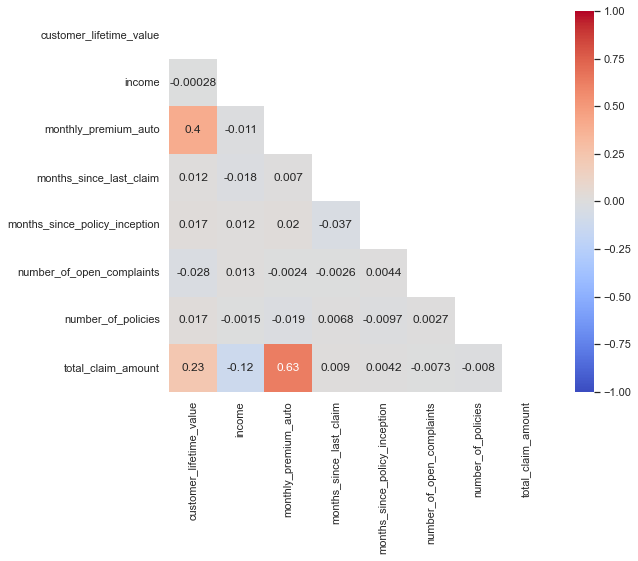

In [29]:
#heatmap  to check if there is any highly correlated values
#the answer is no
corr = numerical.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True      
#burada üst kısmı seçtim sonra aşağıda beyaz yaptım
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
#normalde kod sadece bu kadar, normally this is the code:corr = hk_df.corr()
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

In [30]:
# X-y split (y is the target variable which is the total claim amount)

X=concat_data.drop('total_claim_amount', axis=1)
y=concat_data.total_claim_amount
#X=X._get_numeric_data()
X

#X=numerical.drop('total_claim_amount', axis=1) böyle yazarsam sonra X=X._get_numeric_data()'ya gerek yok'

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,region_east,region_north west,region_west region,...,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small
0,4809,48029,61,7,52,0,9,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2228,26794,64,3,26,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,14947,22139,100,34,31,0,2,1,0,0,...,0,1,0,0,0,0,1,0,1,0
3,22332,49078,97,10,3,0,2,0,1,0,...,1,0,0,0,0,0,0,0,1,0
4,9025,23675,117,15,31,1,7,0,1,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,15563,64811,253,8,40,2,7,0,0,0,...,0,0,1,1,0,0,0,0,1,0
10685,5259,61146,65,7,68,0,6,0,1,0,...,1,0,0,0,0,0,0,0,1,0
10686,23893,39837,201,11,63,0,2,0,0,0,...,0,0,1,0,1,0,0,0,1,0
10687,11971,64195,158,0,27,4,6,0,0,1,...,1,0,0,0,0,0,1,0,1,0


In [31]:
#it was because I removed the outliers and I lost all the column and wanted to check. Not related

print(numerical['number_of_open_complaints'].unique())

[0 1 3 2 4 5]


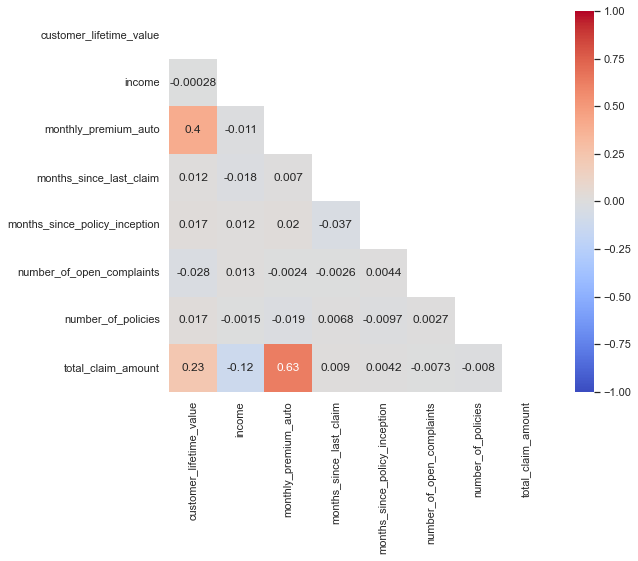

In [32]:
# check if there are highly correlated features and drop them if there are any.
#checked the heatmap and no

corr = numerical.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True      
#burada üst kısmı seçtim sonra aşağıda beyaz yaptım
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
#normalde kod sadece bu kadar, normally this is the code:corr = hk_df.corr()
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

In [33]:
#Linear Regression
# Train-test split.
## I guess we need to do Data Splitting and Francesca agrees. And we did that
# 123 is very important. In this way we standardize the random. it is random but only once. 
# every time when we run the code we get the same random
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)

#X_train, X_test, y_train, y_test=train_test_split(X, y, train_size=.70,random_state=123)
X_train.shape

(7482, 108)

In [34]:
# if we do std scaler we use this formula std_scaler
# if we do power p.fit()

std_scaler=StandardScaler().fit(X_train)   ## finding the parameters ( mean, variance from the training set )

X_train_scaled=std_scaler.transform(X_train)  # transforming happening here with this formula

X_train_scaled

array([[-0.11021627, -1.2632667 , -0.67143823, ...,  1.95232568,
         0.65494534, -0.48945135],
       [-0.42794064, -1.36853038, -0.72925469, ...,  1.95232568,
        -1.52684497,  2.04310398],
       [-0.5223013 ,  0.26299646,  0.48489091, ..., -0.51220962,
         0.65494534, -0.48945135],
       ...,
       [-0.81132612, -1.16342071, -0.90270406, ...,  1.95232568,
        -1.52684497,  2.04310398],
       [ 2.25575772,  0.97656622, -0.78707115, ..., -0.51220962,
         0.65494534, -0.48945135],
       [ 1.18923585, -0.01438919, -0.55580532, ..., -0.51220962,
         0.65494534, -0.48945135]])

In [35]:
X_train.shape

(7482, 108)

In [36]:
X_test.shape

(3207, 108)

In [37]:
#Standardize the data (after the data split).
#test'i de scaled yapmalısın ki adil bir test olsun. bunu sonradan yapıyorum.
#Apply linear regression.
#Model Interpretation.


X_test_scaled=std_scaler.transform(X_test)

In [38]:
print(X_train_scaled)
print("--------")
print(X_test_scaled)

[[-0.11021627 -1.2632667  -0.67143823 ...  1.95232568  0.65494534
  -0.48945135]
 [-0.42794064 -1.36853038 -0.72925469 ...  1.95232568 -1.52684497
   2.04310398]
 [-0.5223013   0.26299646  0.48489091 ... -0.51220962  0.65494534
  -0.48945135]
 ...
 [-0.81132612 -1.16342071 -0.90270406 ...  1.95232568 -1.52684497
   2.04310398]
 [ 2.25575772  0.97656622 -0.78707115 ... -0.51220962  0.65494534
  -0.48945135]
 [ 1.18923585 -0.01438919 -0.55580532 ... -0.51220962  0.65494534
  -0.48945135]]
--------
[[-0.40967729 -0.94647238 -0.61362178 ...  1.95232568  0.65494534
  -0.48945135]
 [-0.7597249  -0.93254692 -0.64253    ... -0.51220962  0.65494534
  -0.48945135]
 [ 0.57248529 -1.22437973 -0.90270406 ...  1.95232568  0.65494534
  -0.48945135]
 ...
 [-0.79857077  0.60844433 -0.58471355 ...  1.95232568  0.65494534
  -0.48945135]
 [-0.42547654 -0.96649777 -0.81597938 ...  1.95232568  0.65494534
  -0.48945135]
 [-0.49881985 -0.94988352  0.71615674 ...  1.95232568 -1.52684497
  -0.48945135]]


In [39]:
X.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'region_east',
       'region_north west', 'region_west region',
       ...
       'sales_channel_branch', 'sales_channel_call center',
       'sales_channel_web', 'vehicle_class_luxury car',
       'vehicle_class_luxury suv', 'vehicle_class_sports car',
       'vehicle_class_suv', 'vehicle_class_two-door car',
       'vehicle_size_medsize', 'vehicle_size_small'],
      dtype='object', length=108)

In [40]:
#Modeling using Statsmodels

X_train_const_scaled = sm.add_constant(X_train_scaled) # adding a constant

model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled) 

X_test_const_scaled = sm.add_constant(X_test_scaled) # adding a constant
predictions_test = model.predict(X_test_const_scaled) 
print_model = model.summary()
print(print_model)

#model.summary()

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     239.0
Date:                Wed, 04 May 2022   Prob (F-statistic):               0.00
Time:                        16:25:10   Log-Likelihood:                -47599.
No. Observations:                7482   AIC:                         9.541e+04
Df Residuals:                    7376   BIC:                         9.614e+04
Df Model:                         105                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        433.0597      1.632    265.345      0.0

In [41]:
predictions_test

array([452.21340455, 394.58564351, 138.85126203, ..., 579.24489257,
       -32.40173853, 480.1344889 ])

In [42]:
#display adjusted R-squared
print(model.rsquared_adj)

0.7696357753043289


In [43]:
#Modeling using Scikit Learn

#since it is a supervized learning we are giving the y's to the model to learn
model=LinearRegression()    # model
model.fit(X_train_scaled, y_train)   # model train


LinearRegression()

In [44]:
#Model fitting model parameters ( b1,b2,b3,b4) only b0 is missing, which is intercept
model.coef_

array([ 1.61098645e-01, -5.05097043e+00,  1.79081512e+02,  5.51280102e+00,
        6.76300261e-01,  1.98246281e+00, -8.14413395e-01,  2.71498616e+00,
        9.07874920e-02,  3.15788694e+00, -9.18003085e+00, -5.44609367e+00,
       -3.91151967e+00, -3.71389000e+00, -3.77187277e+00,  2.21544892e+00,
       -3.45950754e+00, -1.19292148e+00, -1.50311576e+00, -6.12867851e-01,
        3.08194457e+00, -1.16794467e+00, -4.41625289e-01, -1.78925111e+00,
       -1.55933476e+00, -1.67177640e+00, -2.03510171e+00,  1.07951023e+00,
        1.06979115e+00, -1.58875003e+00,  3.87192145e-01, -2.60557068e+00,
       -3.88158602e+00, -9.14104216e-01,  1.80048247e+00,  4.30739773e-01,
       -5.72791200e-01,  2.46225360e+00,  1.20640383e+00, -1.78073680e+00,
       -3.72823040e+00, -7.07255458e-01,  4.32822471e-01, -3.27792979e-01,
       -2.57436934e+00, -9.56006815e-01, -3.39276944e+00,  1.79887629e+13,
        1.83226107e+13,  1.87147763e+13,  1.79887629e+13,  1.62841592e+13,
        1.90349248e+13,  

In [45]:
# now we find b0
model.intercept_

433.0635934348812

In [46]:
#here we try to test our model and find y_predicted

y_pred=model.predict(X_test_scaled)   # model prediction

y_pred_train=model.predict(X_train_scaled)

In [47]:
X

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,region_east,region_north west,region_west region,...,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small
0,4809,48029,61,7,52,0,9,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2228,26794,64,3,26,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,14947,22139,100,34,31,0,2,1,0,0,...,0,1,0,0,0,0,1,0,1,0
3,22332,49078,97,10,3,0,2,0,1,0,...,1,0,0,0,0,0,0,0,1,0
4,9025,23675,117,15,31,1,7,0,1,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,15563,64811,253,8,40,2,7,0,0,0,...,0,0,1,1,0,0,0,0,1,0
10685,5259,61146,65,7,68,0,6,0,1,0,...,1,0,0,0,0,0,0,0,1,0
10686,23893,39837,201,11,63,0,2,0,0,0,...,0,0,1,0,1,0,0,0,1,0
10687,11971,64195,158,0,27,4,6,0,0,1,...,1,0,0,0,0,0,1,0,1,0


In [48]:
# Evaluating Model Performance
y_test

4665     345
4072     345
4549     257
4211     445
3081     523
        ... 
3488     404
1667     554
1516     350
10215     27
2931     320
Name: total_claim_amount, Length: 3207, dtype: int64

In [49]:
#checking the predicted ones
y_pred

array([452.56925914, 394.89168501, 138.85176312, ..., 578.96473683,
       -32.08088418, 480.2211556 ])

In [50]:
residual = y_test - y_pred
residual

4665    -107.569259
4072     -49.891685
4549     118.148237
4211      39.687867
3081      87.944535
            ...    
3488      56.851756
1667      28.437836
1516    -228.964737
10215     59.080884
2931    -160.221156
Name: total_claim_amount, Length: 3207, dtype: float64

In [51]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})

In [52]:
# if we get new data, we can add them
# np.array(np.array(new_data).reshape(-1,4)).shape

#new_data = [2000, 450, 18i 25] #this is a vector # -1 is to make it vertical, 4 is the column
#new_data_scaled =std_scaler.transform(np.array(new_data).reshape(-1,4))
#model is already done, I do not do the fitting again!!
#model.predict new data scaling

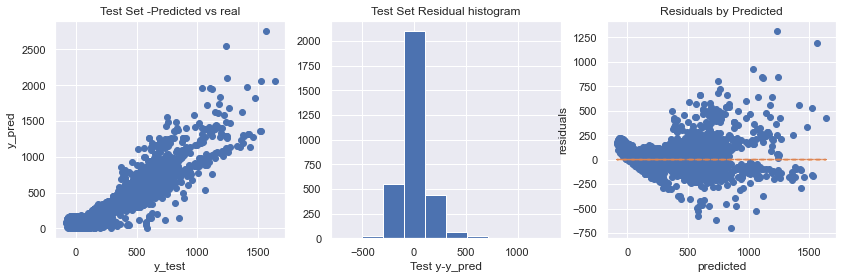

In [53]:
# these are extras from the lab
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A straight line
fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,residual,"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")  # shows me the error!!
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

##### Check the Linear regression assumptions' and bu sure if your model is stable

<AxesSubplot:xlabel='y_pred', ylabel='y_test'>

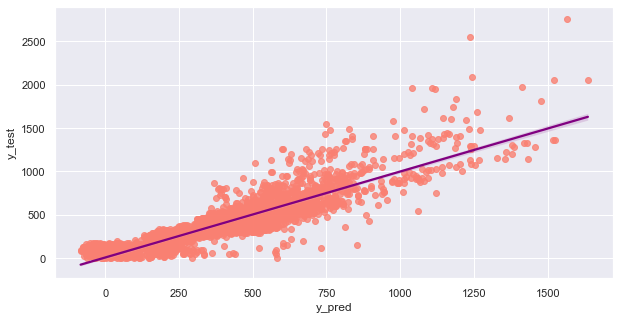

In [54]:
# using seaborn
plt.figure(figsize=(10,5))
sns.regplot(x='y_pred',y='y_test', data=result, scatter_kws={"color": "salmon"}, line_kws={"color": "purple"})

In [55]:
# Model Validation
# Model Evaluation:
# MSE: Mean Squared Error

print(mse(y_test,y_pred))
print(mae(y_test,y_pred))

#this function does not exist in seaborn so we wrote it in numpy
print(np.sqrt(mse(y_test,y_pred)))

19124.77284802885
95.60830070319172
138.29234558726975


In [56]:
# RMSE: Root Mean Squared Error
# MAE:Mean Absolute Error
mse(y_train,y_pred_train)

19647.035976547962

In [57]:
# Feature Importance
# magnitude is important, I am checking which one is effecting my model most

features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)
features_importances

,Attribute,Importance
91,policy_personal l3,1.770289e+14
85,policy_type_personal auto,1.593745e+14
90,policy_personal l2,1.533978e+14
89,policy_personal l1,1.252003e+14
86,policy_type_special auto,1.155025e+14
...,...,...
0,customer_lifetime_value,1.610986e-01
88,policy_corporate l3,1.076403e-01
8,region_north west,9.078749e-02
83,marital_status_married,4.078011e-02


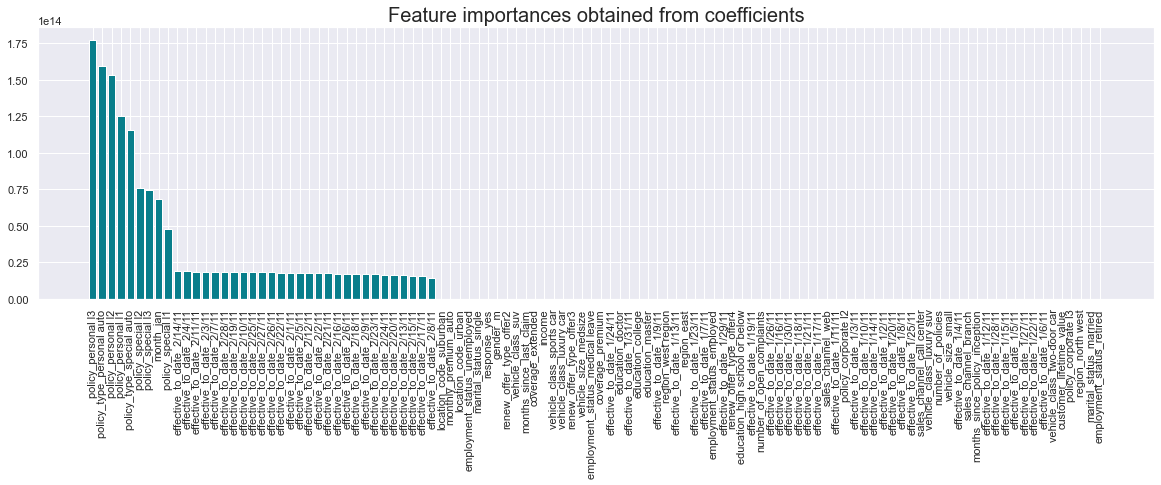

In [58]:
plt.figure(figsize=(20,5)) # this one I add to make it smaller
plt.bar(x=features_importances['Attribute'], height=features_importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [59]:
# R2 has to be big, close to one, otherwise it is a bad model
R2=r2_score(y_test,y_pred)
R2

0.7707274800783903

In [60]:
# Adjusted R2
R2_test=model.score(X_test_scaled,y_test)
R2_train=model.score(X_train_scaled,y_train)

## Activity 7

#### Lab | Comparing regression models
For this lab, we will be using the same dataset for the customer analysis case study we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs.

Instructions

- Define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.
- Use the function to check LinearRegressor, Lasso,Ridge and KNeighbors Regressor.
- Use feature selection techniques to select subset of features to train the model with(if necessary).
- Check and discuss the results.

#### Import the libraries

In [61]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import RFE
from sklearn.impute import SimpleImputer


#### Lasso model 

In [62]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet, LinearRegression
model=Lasso(alpha=0.05)

model.fit(X_train, y_train)
print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

Lasso: Train -> 0.7727546275550929, Test -> 0.7710551757966849


#### Ridge

In [63]:
model=Ridge(alpha=10000)
model.fit(X_train, y_train)
print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

Ridge: Train -> 0.5356975026432069, Test -> 0.5378327359687334


In [64]:
X_train.shape

(7482, 108)

In [65]:
y_train.shape

(7482,)

#### Recursive feature elimination

In [71]:
#from sklearn.feature_selection import RFE  ## recursive feature elemination technique

#X_train_ref, X_test_ref, y_train_ref, y_test_ref = train_test_split(X, y, test_size=0.20, random_state=42)

#X_train_ref = X_train_ref.select_dtypes(include=np.number)
#X_test_ref  = X_test_ref.select_dtypes(include=np.number)
#X_test_ref 

In [72]:
#X_train_ref = pd.DataFrame(X_train, columns=X.columns)
#X_train_ref

In [92]:
from sklearn.feature_selection import RFE  ## recursive feature elemination technique

X_train_ref, X_test_ref, y_train_ref, y_test_ref = train_test_split(X, y, test_size=0.20, random_state=42)

X_train_ref = X_train_ref.select_dtypes(include=np.number)
X_test_ref  = X_test_ref.select_dtypes(include=np.number)

X_train_ref = pd.DataFrame(X_train_ref, columns=X.columns)
X_test_ref  = pd.DataFrame(X_test_ref, columns=X.columns)

#X_train.isna().sum()
nulls = pd.DataFrame(X_train_ref.isna().sum()).reset_index()
#nulls.head()
nulls.columns = ['Column','nas']
#nulls.head()
#nulls[nulls['nas'] > 0].head()
cols_to_drop = nulls[nulls['nas'] > 0]['Column'] # Too drastic, but made on pourpose for quick filtering (don't do this in production!!)

X_train_ref.drop(columns=cols_to_drop, axis=1, inplace = True)
X_test_ref.drop(columns=cols_to_drop, axis=1, inplace = True)

#display(X_train)

lm = LinearRegression()

selector = RFE(lm, n_features_to_select= 48, step = 1, verbose = 1) # Step is how many features to add or drop everytime
selector.fit(X_train_ref, y_train_ref)

kept_features = selector.get_support(indices = True) #returns an array of integers corresponding to nonremoved features
kept_features = list(X_train_ref.iloc[:,kept_features].columns)

X_train_ref = selector.transform(X_train_ref)
X_test_ref  = selector.transform(X_test_ref)

X_train_ref = pd.DataFrame(X_train_ref, columns=kept_features)
X_test_ref  = pd.DataFrame(X_test_ref, columns=kept_features)

print("Final selected features: ")
display(X_train_ref)

Fitting estimator with 108 features.
Fitting estimator with 107 features.
Fitting estimator with 106 features.
Fitting estimator with 105 features.
Fitting estimator with 104 features.
Fitting estimator with 103 features.
Fitting estimator with 102 features.
Fitting estimator with 101 features.
Fitting estimator with 100 features.
Fitting estimator with 99 features.
Fitting estimator with 98 features.
Fitting estimator with 97 features.
Fitting estimator with 96 features.
Fitting estimator with 95 features.
Fitting estimator with 94 features.
Fitting estimator with 93 features.
Fitting estimator with 92 features.
Fitting estimator with 91 features.
Fitting estimator with 90 features.
Fitting estimator with 89 features.
Fitting estimator with 88 features.
Fitting estimator with 87 features.
Fitting estimator with 86 features.
Fitting estimator with 85 features.
Fitting estimator with 84 features.
Fitting estimator with 83 features.
Fitting estimator with 82 features.
Fitting estimator w

,coverage_extended,coverage_premium,effective_to_date_1/20/11,effective_to_date_2/1/11,effective_to_date_2/10/11,effective_to_date_2/11/11,effective_to_date_2/12/11,effective_to_date_2/13/11,effective_to_date_2/14/11,effective_to_date_2/15/11,...,policy_personal l1,policy_personal l2,policy_personal l3,policy_special l1,policy_special l2,policy_special l3,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8546,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
8547,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8548,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
8549,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


#### Check the model again

In [93]:
model=LinearRegression()
model.fit(X_train_ref, y_train_ref)
print(f'{model.__class__.__name__}: Train -> {model.score(X_train_ref, y_train_ref)}, Test -> {model.score(X_test_ref, y_test_ref)}')

LinearRegression: Train -> 0.7254687422413515, Test -> 0.7341401394933762


#### Fitting OLS model

In [218]:
#aplly the model on train set

X_added_constant = sm.add_constant(X_train)
X_added_constant

,const,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,region_east,region_north west,region_west region,response_yes,coverage_extended,coverage_premium,education_college,education_doctor,education_high school or below,education_master,effective_to_date_1/10/11,effective_to_date_1/11/11,effective_to_date_1/12/11,effective_to_date_1/13/11,effective_to_date_1/14/11,effective_to_date_1/15/11,effective_to_date_1/16/11,effective_to_date_1/17/11,effective_to_date_1/18/11,effective_to_date_1/19/11,effective_to_date_1/2/11,effective_to_date_1/20/11,effective_to_date_1/21/11,effective_to_date_1/22/11,effective_to_date_1/23/11,effective_to_date_1/24/11,effective_to_date_1/25/11,effective_to_date_1/26/11,effective_to_date_1/27/11,effective_to_date_1/28/11,effective_to_date_1/29/11,effective_to_date_1/3/11,effective_to_date_1/30/11,effective_to_date_1/31/11,effective_to_date_1/4/11,effective_to_date_1/5/11,effective_to_date_1/6/11,effective_to_date_1/7/11,effective_to_date_1/8/11,effective_to_date_1/9/11,effective_to_date_2/1/11,effective_to_date_2/10/11,effective_to_date_2/11/11,effective_to_date_2/12/11,effective_to_date_2/13/11,effective_to_date_2/14/11,effective_to_date_2/15/11,effective_to_date_2/16/11,effective_to_date_2/17/11,effective_to_date_2/18/11,effective_to_date_2/19/11,effective_to_date_2/2/11,effective_to_date_2/20/11,effective_to_date_2/21/11,effective_to_date_2/22/11,effective_to_date_2/23/11,effective_to_date_2/24/11,effective_to_date_2/25/11,effective_to_date_2/26/11,effective_to_date_2/27/11,effective_to_date_2/28/11,effective_to_date_2/3/11,effective_to_date_2/4/11,effective_to_date_2/5/11,effective_to_date_2/6/11,effective_to_date_2/7/11,effective_to_date_2/8/11,effective_to_date_2/9/11,month_jan,employment_status_employed,employment_status_medical leave,employment_status_retired,employment_status_unemployed,gender_m,location_code_suburban,location_code_urban,marital_status_married,marital_status_single,policy_type_personal auto,policy_type_special auto,policy_corporate l2,policy_corporate l3,policy_personal l1,policy_personal l2,policy_personal l3,policy_special l1,policy_special l2,policy_special l3,renew_offer_type_offer2,renew_offer_type_offer3,renew_offer_type_offer4,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small
6608,1.0,7271,20545,70,23,86,0,2,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0
5697,1.0,5079,17922,68,6,95,0,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
10524,1.0,4428,58577,110,6,62,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
397,1.0,22332,49078,97,10,3,0,2,0,0,1,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1
6324,1.0,2430,67280,70,29,30,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [219]:
y_train = np.array(y_train)

In [220]:
model = sm.OLS(y_train,X_added_constant).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     239.0
Date:                Tue, 03 May 2022   Prob (F-statistic):               0.00
Time:                        17:04:48   Log-Likelihood:                -47599.
No. Observations:                7482   AIC:                         9.541e+04
Df Residuals:                    7376   BIC:                         9.614e+04
Df Model:                         105                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            -346.0703     16.877    -20.506      0.000    -379.154    -312.987
customer_lifetime_value          2.335e-05      0.000      0.089      0.929      -0.000       0.001
income                             -0.0002    7.6e-05     -2.688      0.007      -0.000   -5.53e-05
monthly_premium_auto                5.1772      0.138     37.395      0.000       4.906       5.449
months_since_last_claim             0.5479      0.164      3.345      0.001       0.227       0.869
months_since_policy_inception       0.0237      0.060      0.397      0.692      -0.093       0.141
number_of_open_complaints           2.2341      1.817      1.230      0.219      -1.327       5.795
number_of_policies                 -0.3589      0.693     -0.518      0.604      -1.717       0.999
region_east                         9.6980      6.403      1.515      0.130      -2.854      22.250
region_north west                   0.1678      4.382      0.038      0.969      -8.422       8.757
region_west region                  6.6452      4.165      1.595      0.111      -1.520      14.810
response_yes                      -27.8138      5.436     -5.116      0.000     -38.470     -17.157
coverage_extended                 -12.0111      4.663     -2.576      0.010     -21.151      -2.871
coverage_premium                  -13.5480      8.888     -1.524      0.127     -30.972       3.876
education_college                  -8.2078      4.266     -1.924      0.054     -16.570       0.155
education_doctor                  -20.1477      9.214     -2.187      0.029     -38.210      -2.085
education_high school or below      4.9284      4.324      1.140      0.254      -3.547      13.404
education_master                  -12.8632      6.657     -1.932      0.053     -25.913       0.187
effective_to_date_1/10/11          -8.3723     17.333     -0.483      0.629     -42.350      25.606
effective_to_date_1/11/11         -11.8146     18.327     -0.645      0.519     -47.741      24.112
effective_to_date_1/12/11          -5.3243     19.369     -0.275      0.783     -43.293      32.644
effective_to_date_1/13/11          25.4011     18.855      1.347      0.178     -11.560      62.362
effective_to_date_1/14/11          -8.8112     18.463     -0.477      0.633     -45.004      27.381
effective_to_date_1/15/11          -3.6750     19.101     -0.192      0.847     -41.119      33.769
effective_to_date_1/16/11         -14.8232     18.866     -0.786      0.432     -51.805      22.159
effective_to_date_1/17/11         -10.7371     17.433     -0.616      0.538     -44.911      23.437
effective_to_date_1/18/11         -12.7309     18.071     -0.705      0.481     -48.154      22.693
effective_to_date_1/19/11         -14.8948     17.575     -0.848      0.397     -49

#### P values

In [221]:
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm

In [227]:
#apply the model on train set

X1_added_constant = sm.add_constant(X_train)
X1_added_constant

,const,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,region_east,region_north west,region_west region,response_yes,coverage_extended,coverage_premium,education_college,education_doctor,education_high school or below,education_master,effective_to_date_1/10/11,effective_to_date_1/11/11,effective_to_date_1/12/11,effective_to_date_1/13/11,effective_to_date_1/14/11,effective_to_date_1/15/11,effective_to_date_1/16/11,effective_to_date_1/17/11,effective_to_date_1/18/11,effective_to_date_1/19/11,effective_to_date_1/2/11,effective_to_date_1/20/11,effective_to_date_1/21/11,effective_to_date_1/22/11,effective_to_date_1/23/11,effective_to_date_1/24/11,effective_to_date_1/25/11,effective_to_date_1/26/11,effective_to_date_1/27/11,effective_to_date_1/28/11,effective_to_date_1/29/11,effective_to_date_1/3/11,effective_to_date_1/30/11,effective_to_date_1/31/11,effective_to_date_1/4/11,effective_to_date_1/5/11,effective_to_date_1/6/11,effective_to_date_1/7/11,effective_to_date_1/8/11,effective_to_date_1/9/11,effective_to_date_2/1/11,effective_to_date_2/10/11,effective_to_date_2/11/11,effective_to_date_2/12/11,effective_to_date_2/13/11,effective_to_date_2/14/11,effective_to_date_2/15/11,effective_to_date_2/16/11,effective_to_date_2/17/11,effective_to_date_2/18/11,effective_to_date_2/19/11,effective_to_date_2/2/11,effective_to_date_2/20/11,effective_to_date_2/21/11,effective_to_date_2/22/11,effective_to_date_2/23/11,effective_to_date_2/24/11,effective_to_date_2/25/11,effective_to_date_2/26/11,effective_to_date_2/27/11,effective_to_date_2/28/11,effective_to_date_2/3/11,effective_to_date_2/4/11,effective_to_date_2/5/11,effective_to_date_2/6/11,effective_to_date_2/7/11,effective_to_date_2/8/11,effective_to_date_2/9/11,month_jan,employment_status_employed,employment_status_medical leave,employment_status_retired,employment_status_unemployed,gender_m,location_code_suburban,location_code_urban,marital_status_married,marital_status_single,policy_type_personal auto,policy_type_special auto,policy_corporate l2,policy_corporate l3,policy_personal l1,policy_personal l2,policy_personal l3,policy_special l1,policy_special l2,policy_special l3,renew_offer_type_offer2,renew_offer_type_offer3,renew_offer_type_offer4,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small
6608,1.0,7271,20545,70,23,86,0,2,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0
5697,1.0,5079,17922,68,6,95,0,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
10524,1.0,4428,58577,110,6,62,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
397,1.0,22332,49078,97,10,3,0,2,0,0,1,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1
6324,1.0,2430,67280,70,29,30,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [223]:
model.params[list(np.where(model.pvalues < 0.05)[0])].iloc[0:].index.tolist()
significant_features_train=X1_added_constant[model.params[list(np.where(model.pvalues < 0.05)[0])].iloc[0:].index.tolist()]
significant_features_train

,const,income,monthly_premium_auto,months_since_last_claim,response_yes,coverage_extended,education_doctor,effective_to_date_2/12/11,effective_to_date_2/14/11,effective_to_date_2/23/11,effective_to_date_2/26/11,effective_to_date_2/28/11,effective_to_date_2/3/11,effective_to_date_2/9/11,employment_status_unemployed,gender_m,location_code_suburban,location_code_urban,marital_status_single,policy_special l1,renew_offer_type_offer2,renew_offer_type_offer3,vehicle_class_sports car,vehicle_class_suv
6608,1.0,20545,70,23,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0
5697,1.0,17922,68,6,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0
10524,1.0,58577,110,6,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
397,1.0,49078,97,10,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,1
6324,1.0,67280,70,29,0,0,0,0,0,1,0,0,0,0,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9785,1.0,73938,76,34,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7763,1.0,78834,72,14,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0
5218,1.0,23033,62,5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1346,1.0,76358,66,25,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [224]:
#apply the model on test set

X2_added_constant = sm.add_constant(X_test)
X2_added_constant

,const,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,region_east,region_north west,region_west region,response_yes,coverage_extended,coverage_premium,education_college,education_doctor,education_high school or below,education_master,effective_to_date_1/10/11,effective_to_date_1/11/11,effective_to_date_1/12/11,effective_to_date_1/13/11,effective_to_date_1/14/11,effective_to_date_1/15/11,effective_to_date_1/16/11,effective_to_date_1/17/11,effective_to_date_1/18/11,effective_to_date_1/19/11,effective_to_date_1/2/11,effective_to_date_1/20/11,effective_to_date_1/21/11,effective_to_date_1/22/11,effective_to_date_1/23/11,effective_to_date_1/24/11,effective_to_date_1/25/11,effective_to_date_1/26/11,effective_to_date_1/27/11,effective_to_date_1/28/11,effective_to_date_1/29/11,effective_to_date_1/3/11,effective_to_date_1/30/11,effective_to_date_1/31/11,effective_to_date_1/4/11,effective_to_date_1/5/11,effective_to_date_1/6/11,effective_to_date_1/7/11,effective_to_date_1/8/11,effective_to_date_1/9/11,effective_to_date_2/1/11,effective_to_date_2/10/11,effective_to_date_2/11/11,effective_to_date_2/12/11,effective_to_date_2/13/11,effective_to_date_2/14/11,effective_to_date_2/15/11,effective_to_date_2/16/11,effective_to_date_2/17/11,effective_to_date_2/18/11,effective_to_date_2/19/11,effective_to_date_2/2/11,effective_to_date_2/20/11,effective_to_date_2/21/11,effective_to_date_2/22/11,effective_to_date_2/23/11,effective_to_date_2/24/11,effective_to_date_2/25/11,effective_to_date_2/26/11,effective_to_date_2/27/11,effective_to_date_2/28/11,effective_to_date_2/3/11,effective_to_date_2/4/11,effective_to_date_2/5/11,effective_to_date_2/6/11,effective_to_date_2/7/11,effective_to_date_2/8/11,effective_to_date_2/9/11,month_jan,employment_status_employed,employment_status_medical leave,employment_status_retired,employment_status_unemployed,gender_m,location_code_suburban,location_code_urban,marital_status_married,marital_status_single,policy_type_personal auto,policy_type_special auto,policy_corporate l2,policy_corporate l3,policy_personal l1,policy_personal l2,policy_personal l3,policy_special l1,policy_special l2,policy_special l3,renew_offer_type_offer2,renew_offer_type_offer3,renew_offer_type_offer4,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small
4665,1.0,5205,28439,72,18,91,0,9,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0
4072,1.0,2790,28786,71,30,69,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4549,1.0,11981,21514,62,0,59,0,2,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
4211,1.0,5872,77156,73,30,39,0,7,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3081,1.0,9403,56410,117,13,73,0,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [225]:
model.params[list(np.where(model.pvalues < 0.05)[0])].iloc[0:].index.tolist()
significant_features_test=X2_added_constant[model.params[list(np.where(model.pvalues < 0.05)[0])].iloc[0:].index.tolist()]
significant_features_test

,const,income,monthly_premium_auto,months_since_last_claim,response_yes,coverage_extended,education_doctor,effective_to_date_2/12/11,effective_to_date_2/14/11,effective_to_date_2/23/11,effective_to_date_2/26/11,effective_to_date_2/28/11,effective_to_date_2/3/11,effective_to_date_2/9/11,employment_status_unemployed,gender_m,location_code_suburban,location_code_urban,marital_status_single,policy_special l1,renew_offer_type_offer2,renew_offer_type_offer3,vehicle_class_sports car,vehicle_class_suv
4665,1.0,28439,72,18,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
4072,1.0,28786,71,30,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
4549,1.0,21514,62,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4211,1.0,77156,73,30,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3081,1.0,56410,117,13,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3488,1.0,23665,67,19,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
1667,1.0,65263,82,25,0,1,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0
1516,1.0,67185,73,24,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,1,0,0,0
10215,1.0,27940,65,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


### Applying the OLS model on the selected features

In [226]:
X3_test = significant_features_test
X3_train = significant_features_train

In [228]:
X3_test.shape

(3207, 24)

In [229]:
X3_train.shape

(7482, 24)

In [230]:
y_train.shape

(7482,)

In [231]:
y_test.shape

(3207,)

In [232]:
model=LinearRegression()
model.fit(X3_train, y_train)
print(f'{model.__class__.__name__}: Train -> {model.score(X3_train, y_train)}, Test -> {model.score(X3_test, y_test)}')

LinearRegression: Train -> 0.769611710288904, Test -> 0.7708040577719018


In [233]:
# Test Lasso
from sklearn.linear_model import Lasso,Ridge,ElasticNet, LinearRegression
model=Lasso(alpha=0.5)
model.fit(X3_train, y_train)
print(f'{model.__class__.__name__}: Train -> {model.score(X3_train, y_train)}, Test -> {model.score(X3_test, y_test)}')

Lasso: Train -> 0.7686500467421855, Test -> 0.7703916177158325


In [234]:
# Test Ridge
model=Ridge(alpha=0.05)
model.fit(X3_train, y_train)
print(f'{model.__class__.__name__}: Train -> {model.score(X3_train, y_train)}, Test -> {model.score(X3_test, y_test)}')

Ridge: Train -> 0.7696117087489349, Test -> 0.770804326101409
